<a href="https://colab.research.google.com/github/Riddhiman-M/Digit-Recognizer/blob/main/DigitRecogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from PIL import Image as im

In [2]:
!pip install mnist
import mnist

x_train = mnist.train_images()
y_train = mnist.train_labels()

x_test, y_test = mnist.test_images(), mnist.test_labels()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Visualize Images

In [3]:
def print_img(test):
  l = min(len(test[0]), 10)

  plt.figure()
  f, plots = plt.subplots(l, 1)
  
  for i in range(l):
    plots[i].imshow(test[i], cmap='gray')

## Training data visualisation

(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

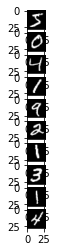

In [4]:
print(x_train.shape)

print_img(x_train)


In [5]:
## Using Loaded Dataset

# train = pd.read_csv("mnist_train.csv")
# test = pd.read_csv("mnist_test.csv")

# # print(train.loc[[0]])

# labels = train['label']
# train = train.drop(['label'], axis=1)

# five = np.asarray(train.loc[[7]]).astype(int)
# five = np.reshape(five, (28,28))

# # print(five)

# # img = im.fromarray(five)
# # img.save('pic1.png')
# # img.show()

# plt.imshow(five, cmap='gray')

## Data Pre-processing for using ML Models

In [7]:
from sklearn.metrics import accuracy_score, classification_report

num, rows, cols = x_train.shape
x_train_2d = x_train.reshape(num, rows*cols)

num, rows, cols = x_test.shape
x_test_2d = x_test.reshape(num, rows*cols)


## Random Forest

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

num, rows, cols = x_train.shape
x_train_2d = x_train.reshape(num, rows*cols)

num, rows, cols = x_test.shape
x_test_2d = x_test.reshape(num, rows*cols)

model = RandomForestClassifier()
model.fit(x_train_2d, y_train)

RandomForestClassifier()

[7 2 1 0 4 1 4 9 5 9]
0.9691


<Figure size 432x288 with 0 Axes>

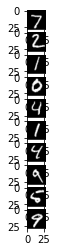

In [9]:
y_out = model.predict(x_test_2d)

print(y_out[:10])
print(accuracy_score(y_test, y_out))

print_img(x_test)

## K Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_2d, y_train)

y_knn = knn.predict(x_test_2d)

print(y_knn)
print(accuracy_score(y_test, y_knn))

[7 2 1 ... 4 5 6]
0.9694


In [11]:
# no. of neighbors = 7 was found to be the optimum out of 4-5 tests

print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Deep-Learning Based Model

In [26]:
from tensorflow import keras
from keras import layers

length = rows*cols

model = keras.Sequential([ layers.Dense(units = 512, activation = 'relu', input_shape=[length]),
                           layers.Dropout(0.3),
                           layers.Dense(units = 128, activation = 'relu'),
                           layers.Dropout(0.3),
                           layers.Dense(units = 10, activation = 'softmax')])

In [14]:
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

print(Y_train[:3])
print(y_train[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4]


In [28]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_2d, Y_train,
          batch_size=100,
          epochs=30,
          verbose = 2)


Epoch 1/30
600/600 - 9s - loss: 0.1615 - accuracy: 0.9632 - 9s/epoch - 15ms/step
Epoch 2/30
600/600 - 8s - loss: 0.1496 - accuracy: 0.9644 - 8s/epoch - 13ms/step
Epoch 3/30
600/600 - 8s - loss: 0.1448 - accuracy: 0.9643 - 8s/epoch - 13ms/step
Epoch 4/30
600/600 - 7s - loss: 0.1472 - accuracy: 0.9634 - 7s/epoch - 12ms/step
Epoch 5/30
600/600 - 7s - loss: 0.1465 - accuracy: 0.9638 - 7s/epoch - 12ms/step
Epoch 6/30
600/600 - 7s - loss: 0.1309 - accuracy: 0.9662 - 7s/epoch - 12ms/step
Epoch 7/30
600/600 - 7s - loss: 0.1334 - accuracy: 0.9664 - 7s/epoch - 12ms/step
Epoch 8/30
600/600 - 7s - loss: 0.1290 - accuracy: 0.9672 - 7s/epoch - 11ms/step
Epoch 9/30
600/600 - 7s - loss: 0.1286 - accuracy: 0.9682 - 7s/epoch - 12ms/step
Epoch 10/30
600/600 - 7s - loss: 0.1210 - accuracy: 0.9685 - 7s/epoch - 12ms/step
Epoch 11/30
600/600 - 7s - loss: 0.1296 - accuracy: 0.9678 - 7s/epoch - 12ms/step
Epoch 12/30
600/600 - 7s - loss: 0.1336 - accuracy: 0.9678 - 7s/epoch - 12ms/step
Epoch 13/30
600/600 - 7s 

In [30]:
y_pred = model.predict(x_test_2d)

y_out_DL = np.argmax(y_pred, axis=1)
print(y_out_DL)

print('% Accuracy:', 100*accuracy_score(y_test, y_out_DL))

313/313 [==============================] - 2s 8ms/step
[7 2 1 ... 4 5 6]
% Accuracy: 97.75
